In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.8.2


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [38]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=[28, 28, 1], activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss = tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [39]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('accuracy') is not None and logs.get('accuracy') >= 0.9):
      self.model.stop_training = True

callback = myCallback()

In [40]:
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4441 - accuracy: 0.8382
Epoch 2/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2985 - accuracy: 0.8910
Epoch 3/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2511 - accuracy: 0.9083


In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2756 - accuracy: 0.8980


[0.2756243944168091, 0.8980000019073486]

[5.9074642e-05 7.3350207e-06 7.4980599e-06 2.4996498e-06 6.3533901e-07
 3.1715862e-02 3.5608359e-04 3.0358706e-02 2.4358730e-04 9.9937256e+01]
9 9


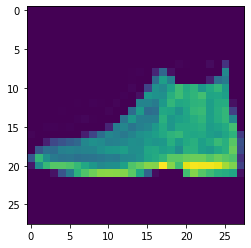

In [49]:
index = 0
predict = model.predict(x_test)[index]
print(predict * 100)
print(np.argmax(predict), y_test[index])
plt.imshow(x_test[index])

In [43]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


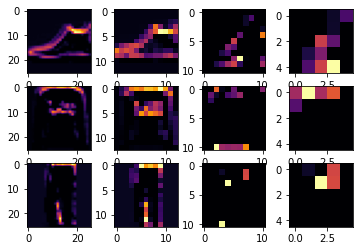

In [48]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
